In [2]:
import numpy as np
import torchvision
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## CIFAR10 VISUALISATION

In [3]:
data = np.load('data/CIFAR10/CIFAR10_0_16.npz')
data = data['train']

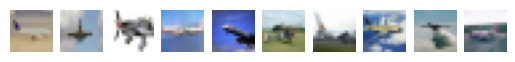

In [33]:
fig, ax = plt.subplots(1, 10)
for i in range(10):
    ax[i].imshow(data[np.random.randint(0, data.shape[0])   ])
    ax[i].axis('off')
plt.show()


## Conv2D


Conv2D expects an input of shape (N,Cin,H,W)   ====>    (N,Cout,Hout,Wout)
Kindof like it applies K Kernel filter's to each channel of input.... to give K*cin = cout layers of output.
for each of the N datapoints.


Hout = floor( (H + 2*P - K)/ S  ) + 1


## Loading Model, Sampling

In [2]:
import os
import argparse
import torch
import numpy as np
from model import LitDiffusionModel
import matplotlib.pyplot as plt

DICT = np.load('data/CIFAR10/CIFAR10_0_16.npz')
trainset = DICT['train']/255
mean = trainset.mean(axis=0)
std = trainset.std(axis=0)


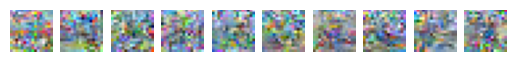

In [26]:

litmodelv2 = LitDiffusionModel.load_from_checkpoint(
    './runs/data=CIFAR10_0_16.npz,n_steps=50,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/last-v2.ckpt',
    hparams_path = './runs/data=CIFAR10_0_16.npz,n_steps=50,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/lightning_logs/version_2/hparams.yaml'
)
litmodelv2.eval()

X = litmodelv2.sample(10,return_intermediate=False)

fig, ax = plt.subplots(1,10)
for i in range(10):
    x = X[i].detach().numpy().transpose(1,2,0)*std + mean 
    x = np.clip(x,0,1)
    ax[i].imshow(x)
    ax[i].axis('off')

plt.show()


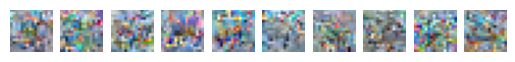

In [25]:

litmodelv3 = LitDiffusionModel.load_from_checkpoint(
    './runs/data=CIFAR10_0_16.npz,n_steps=50,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/last-v3.ckpt',
    hparams_path = './runs/data=CIFAR10_0_16.npz,n_steps=50,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/lightning_logs/version_3/hparams.yaml'
)
litmodelv3.eval()

X = litmodelv3.sample(10,return_intermediate=False)

fig, ax = plt.subplots(1,10)
for i in range(10):
    x = X[i].detach().numpy().transpose(1,2,0)*std + mean 
    x = np.clip(x,0,1)
    ax[i].imshow(x)
    ax[i].axis('off')

plt.show()

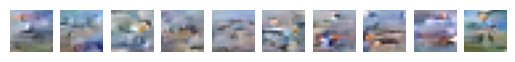

In [5]:
litmodelv4 = LitDiffusionModel.load_from_checkpoint(
    './runs/data=CIFAR10_0_16.npz,n_steps=200,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/last.ckpt',
    hparams_path = './runs/data=CIFAR10_0_16.npz,n_steps=200,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/lightning_logs/version_0/hparams.yaml'
)
litmodelv4.eval()

X = litmodelv4.sample(10,return_intermediate=False)

fig, ax = plt.subplots(1,10)
for i in range(10):
    x = X[i].detach().numpy().transpose(1,2,0)*std + mean 
    x = np.clip(x,0,1)
    ax[i].imshow(x)
    ax[i].axis('off')

plt.show()


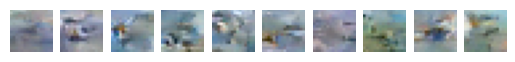

In [6]:
litmodelv5 = LitDiffusionModel.load_from_checkpoint(
    './runs/data=CIFAR10_0_16.npz,n_steps=200,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=50,noise=linear/last.ckpt',
    hparams_path = './runs/data=CIFAR10_0_16.npz,n_steps=200,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=50,noise=linear/lightning_logs/version_0/hparams.yaml'
)
litmodelv5.eval()

X = litmodelv5.sample(10,return_intermediate=False)

fig, ax = plt.subplots(1,10)
for i in range(10):
    x = X[i].detach().numpy().transpose(1,2,0)*std + mean 
    x = np.clip(x,0,1)
    ax[i].imshow(x)
    ax[i].axis('off')

plt.show()

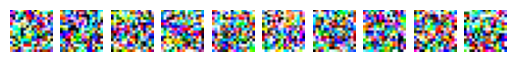

In [4]:
litmodelv6 = LitDiffusionModel.load_from_checkpoint(
    './runs/data=CIFAR10_0_16.npz,n_steps=300,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/last.ckpt',
    hparams_path = './runs/data=CIFAR10_0_16.npz,n_steps=300,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100,noise=linear/lightning_logs/version_0/hparams.yaml'
)
litmodelv6.eval()

X = litmodelv6.sample(10,return_intermediate=False)

fig, ax = plt.subplots(1,10)
for i in range(10):
    x = X[i].detach().numpy().transpose(1,2,0)*std + mean 
    x = np.clip(x,0,1)
    ax[i].imshow(x)
    ax[i].axis('off')

plt.show()